# Nuages de mots

## Imports et stopwords

In [1]:
from collections import Counter
from wordcloud import WordCloud
import os
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from IPython.display import Image

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\janvi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
# Stopwords (Idem que dans s1)
sw = stopwords.words("french")
sw += ["les", "plus", "cette", "fait", "faire", "être", "deux", "comme", "dont", "tout",
       "ils", "bien", "sans", "peut", "tous", "après", "ainsi", "donc", "cet", "sous",
       "celle", "entre", "encore", "toutes", "pendant", "moins", "dire", "cela", "non",
       "faut", "trois", "aussi", "dit", "avoir", "doit", "contre", "depuis", "autres",
       "van", "het", "autre", "jusqu", "ville", "rossel", "dem"]
sw = set(sw)


## Créer un fichier contenant le texte de tous les journaux d'une année donnée

In [3]:
# Choisir une année
year = 1945

In [4]:
# Lister les Fichiers
data_path = "../data/camille_crise_economique_des_annees_1930/"
files = os.listdir(data_path)

In [5]:
# Stocker le contenu de ces fichiers dans une liste
content_list = []
for myFile in files:
    with open(data_path+myFile, 'r', encoding='utf-8') as f:
        content_list.append(f.read())

In [6]:
# Compter le nombre d'éléments (=fichiers) dans la liste
len(content_list)

1000

In [7]:
# Imprimer les 200 premiers caractères du contenu du premier fichier
content_list[0][0:200]

'Samedi 22 Mars 1930. « LE DRAPEAU ROUGE » u Flèches Rouges u Les faits internationaux de la semaine Les lauriers de M. Sinzot empêchent M. Branquart de dormir. M. Sinzot est, évidemment, un homme « de'

In [8]:
# Ecrire tout le contenu dans un fichier temporaire
temp_path = '../data/tmp'
if not os.path.exists(temp_path):
    os.mkdir(temp_path)
with open(os.path.join(temp_path, 'crise.txt'), 'w', encoding='utf-8') as f:
    f.write(' '.join(content_list))

In [9]:
# Imprimer le contenu du fichier et constater les "déchets"
with open(os.path.join(temp_path, 'crise.txt'), 'r', encoding='utf-8') as f:
    before = f.read()

before[:500]

'Samedi 22 Mars 1930. « LE DRAPEAU ROUGE » u Flèches Rouges u Les faits internationaux de la semaine Les lauriers de M. Sinzot empêchent M. Branquart de dormir. M. Sinzot est, évidemment, un homme « de stoc ». // sait rugir, mugir à lui seul, mieux que toute une ménagerie. fl a employé ses talents, à la Chambre, pour, dénoncer les communistes en général ct notre camarade, [acquemottè, en particulier, comme des « pilleurs dc cadavres ». Tout cela à propos de la scandaleuse parade du consul fascist'

## Nettoyer le fichier à l'aide d'une fonction de nettoyage

### Créer la fonction de nettoyage (à adapter)

In [10]:
def clean_text(folder=None):
    if folder is None:
        input_path = "crise.txt"
        output_path = "crise_clean.txt"
    else:
        input_path = f"{folder}/crise.txt"
        output_path = f"{folder}/crise_clean.txt"
    output = open(output_path, "w", encoding='utf-8')
    with open(input_path, 'r', encoding='utf-8') as f:
        text = f.read()
        words = nltk.wordpunct_tokenize(text)
        kept = [w.upper() for w in words if len(w) > 2 and w.isalpha() and w.lower() not in sw]
        kept_string = " ".join(kept)
        output.write(kept_string)
    return f'Output has been written in {output_path}!'

### Appliquer la fonction sur le fichier complet de l'année

In [11]:
clean_text(folder=temp_path)

'Output has been written in ../data/tmp/crise_clean.txt!'

In [12]:
# Vérifier le résultat
with open(os.path.join(temp_path, 'crise_clean.txt'), 'r', encoding='utf-8') as f:
    after = f.read()

after[:500]

'SAMEDI MARS DRAPEAU ROUGE FLÈCHES ROUGES FAITS INTERNATIONAUX SEMAINE LAURIERS SINZOT EMPÊCHENT BRANQUART DORMIR SINZOT ÉVIDEMMENT HOMME STOC SAIT RUGIR MUGIR SEUL MIEUX TOUTE MÉNAGERIE EMPLOYÉ TALENTS CHAMBRE DÉNONCER COMMUNISTES GÉNÉRAL CAMARADE ACQUEMOTTÈ PARTICULIER PILLEURS CADAVRES PROPOS SCANDALEUSE PARADE CONSUL FASCISTE POLONAIS ADMINISTRATEURS CHARBONNAGE CAZIER COLLÈGE SOCIALISTE MARCINELLE TOMBES FRÈRES MINEURS ASSASSINÉS CAPITALISME LAURIERS SINZOT DÉPUTÉ CATHOLIQUE EMPÊCHÉ RENÉ BRA'

## Nuage de mots

### Afficher les termes les plus fréquents


In [13]:
frequencies = Counter(after.split())
print(frequencies.most_common(10))

[('PAYS', 7768), ('GOUVERNEMENT', 7488), ('MILLIONS', 6876), ('CRISE', 6840), ('FRANCS', 6006), ('BELGIQUE', 5614), ('PRIX', 5590), ('LEURS', 5373), ('BRUXELLES', 5203), ('COURS', 5167)]


### Créer, stocker et afficher le nuage de mots

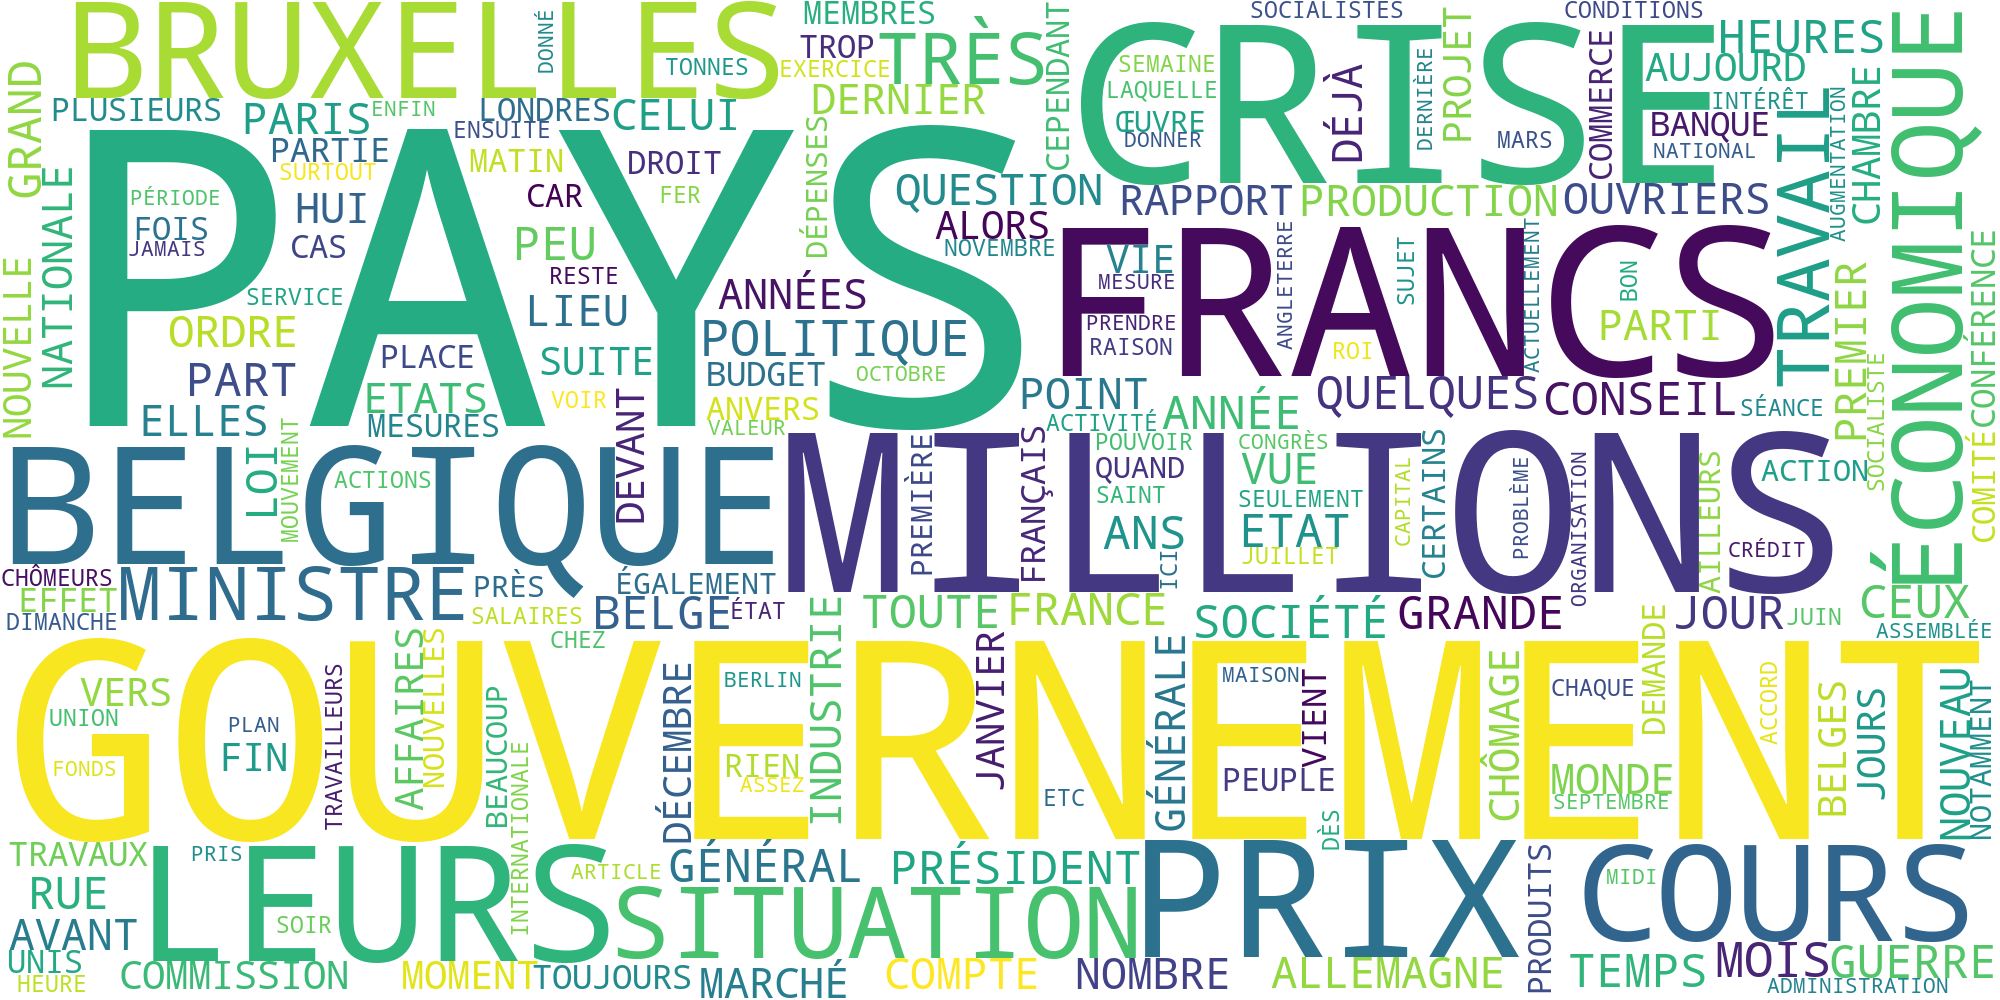

In [14]:
cloud = WordCloud(width=2000, height=1000, background_color='white').generate_from_frequencies(frequencies)
cloud.to_file(os.path.join(temp_path, "crise.png"))
Image(filename=os.path.join(temp_path, "crise.png"))